In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

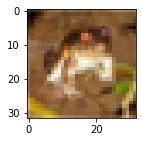

In [6]:
plt.figure(figsize=(15,2))
plt.imshow(x_train[0])
plt.show()

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train = y_train.reshape(-1)

In [9]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
classes[9]

'truck'

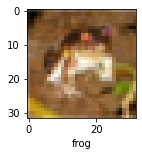

In [12]:
def plot_sample(x,y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

plot_sample(x_train, y_train, 0)

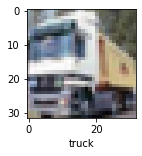

In [18]:
plot_sample(x_train, y_train, 1)

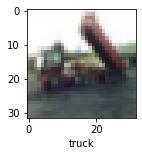

In [19]:
plot_sample(x_train, y_train, 2)

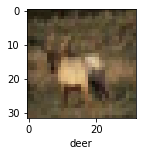

In [20]:
plot_sample(x_train, y_train, 3)

In [21]:
x_train = x_train/255
x_test = x_test/255

In [22]:
ann = models.Sequential([
                         layers.Flatten(input_shape=(32, 32, 3)),
                         layers.Dense(3000, activation="relu"),
                         layers.Dense(1000, activation="relu"),
                         layers.Dense(10, activation="sigmoid")
])

In [23]:
ann.compile(optimizer="SGD",
            loss = "sparse_categorical_crossentropy",
            metrics = ["accuracy"])

In [24]:
ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 98s 63ms/step - loss: 1.9342 - accuracy: 0.3037
Epoch 2/5
1563/1563 [==============================] - 97s 62ms/step - loss: 1.6383 - accuracy: 0.4237
Epoch 3/5
1563/1563 [==============================] - 97s 62ms/step - loss: 1.5489 - accuracy: 0.4532
Epoch 4/5
1563/1563 [==============================] - 96s 62ms/step - loss: 1.4860 - accuracy: 0.4706
Epoch 5/5
1563/1563 [==============================] - 97s 62ms/step - loss: 1.4362 - accuracy: 0.4929


In [35]:
cnn = models.Sequential([
                         layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)),
                         layers.MaxPooling2D((2,2)),


                        layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
                        layers.MaxPooling2D((2,2)),

                        layers.Flatten(),
                        layers.Dense(64, activation="relu"),
                        layers.Dense(10, activation="softmax")
                  ])

In [39]:
cnn.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

In [40]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.6517 - accuracy: 0.4009
Epoch 2/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.1165 - accuracy: 0.6062
Epoch 3/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.9769 - accuracy: 0.6598
Epoch 4/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8812 - accuracy: 0.6906
Epoch 5/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.8094 - accuracy: 0.7184
Epoch 6/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.7408 - accuracy: 0.7403
Epoch 7/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.6902 - accuracy: 0.7565
Epoch 8/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.6372 - accuracy: 0.7778
Epoch 9/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6033 - accuracy: 0.7865
Epoch 10/10
1563/1563 [==============================] - 58s 37m

In [41]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.9646 - accuracy: 0.6955


[0.9646355509757996, 0.6955000162124634]

In [42]:
y_test = y_test.reshape(-1)

In [43]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

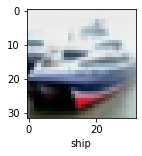

In [44]:
plot_sample(x_test, y_test, 1)

In [45]:
y_pred = cnn.predict(x_test)

In [46]:
y_pred[:5]

array([[9.58518576e-05, 1.06517145e-04, 3.17597005e-04, 6.90094292e-01,
        3.73717157e-05, 1.56706467e-01, 1.50877133e-01, 2.62463836e-05,
        1.71726127e-03, 2.13146468e-05],
       [1.89604121e-03, 6.26046385e-04, 6.54988419e-09, 1.32990374e-08,
        1.26660116e-09, 2.55902433e-09, 5.20954302e-07, 2.27485739e-10,
        9.97462749e-01, 1.46644707e-05],
       [7.82050192e-02, 2.29698024e-03, 1.29799941e-03, 5.32272330e-04,
        4.94670996e-04, 1.28175510e-04, 2.32382692e-04, 1.17352617e-03,
        9.04780507e-01, 1.08584939e-02],
       [9.59691107e-01, 8.67493218e-05, 2.98217256e-02, 1.10365196e-04,
        5.24455449e-04, 5.32822128e-07, 1.19768993e-04, 1.52959274e-06,
        9.62374546e-03, 2.01114981e-05],
       [2.17595169e-08, 1.04002975e-05, 1.00118583e-02, 2.12145835e-01,
        2.50310987e-01, 7.96103571e-03, 5.19413233e-01, 1.14444141e-04,
        3.14568970e-05, 7.45414866e-07]], dtype=float32)

In [48]:
y_classes = [np.argmax(element) for element in y_pred]

In [49]:
y_classes[:5]

[3, 8, 8, 0, 6]

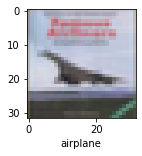

In [53]:
plot_sample(x_test, y_test, 3)

In [54]:
classes[y_classes[3]]

'airplane'

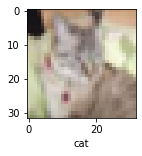

In [55]:
plot_sample(x_test, y_test, 8)

In [58]:
classes[y_classes[8]]

'cat'